# Machine learning -Edge Detection

 First we need to import the necessary libraries for array manipulation, image processing and plotting

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib

get_ipython().magic(u'matplotlib inline')
matplotlib.rcParams["savefig.dpi"] = 400 # to get high resolution

## Canny Edge Detection

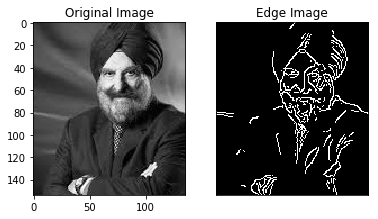

In [6]:
img = cv2.imread('kapany.jpg',0)
edges = cv2.Canny(img,150,200)

# Plotting
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image') #, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.savefig('kapany_.png')

## Feature 2: Sobel Derivative

As a 1st feature we pick the pixel intensity value, as a 2nd value we will use the Sobel Derivative of each pixel

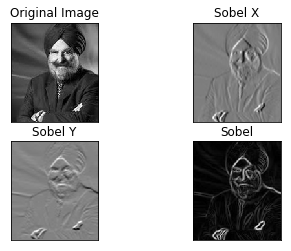

In [4]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobel = np.sqrt(np.square(sobelx)+np.square(sobely))

# Plotting
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.savefig('kapany_Sobel_derivatives.png')

## Training Set

In [7]:
# Transforming the feature set in the appropriate form for sklearn
X1=img.reshape(-1) #Feature 1
X2=sobel.reshape(-1) # Feature 2
X=np.zeros((len(X1),2))
X[:,0]=X1
X[:,1]=X2

Y=np.reshape(edges/255,-1)
train=range (150*150, 150*150) # (2048*1221,2048*1231)
X_train=np.array(X[train])
Y_train=np.array(Y[train])


# Plotting
plt.figure(1, figsize=(9, 3))
# upper and lower limits of the left plot
up=range(train[0]-img.shape[1]*10,train[0])
down=range(train[-1],train[-1]+img.shape[1]*10)
Ymarked=np.array(Y)
Ymarked[up]=1
Ymarked[down]=1
Ymarked_edges=Ymarked.reshape((2048, 2048))*255
plt.subplot(1,2,1)
plt.imshow(Ymarked_edges,cmap = 'gray')
plt.title('Training Set (Edge Image)'), plt.xticks([]), plt.yticks([])

# Separation of Edges and Non-Edges for the right plot
labels=['Non-Edges','Edges']
nonedge = np.where(Y_train==0)
edge = np.where(Y_train==1)

plt.subplot(1,2,2)
nonedgeplt = plt.scatter(X_train[nonedge,0], X_train[nonedge,1], c='b', label=labels[0])
edgeplt = plt.scatter(X_train[edge,0], X_train[edge,1], c='r', label=labels[1])

plt.title('Training Set (20480 pixels)')
plt.xlabel('Pixel Color Values')
plt.ylabel('Pixel Sobel Derivative Values')
plt.legend(handles=[nonedgeplt,edgeplt],loc=2)

plt.savefig('kapany_Training_Set_edge.png')

IndexError: range object index out of range

The area within the white region on the left represents our dataset which is visualized with respect to our feature set on the left.

## Linear Logistic Regression

Apply simple logistic regression to the above data set to classify the elements and then visualize the fitting and the results.

In [9]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, Y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

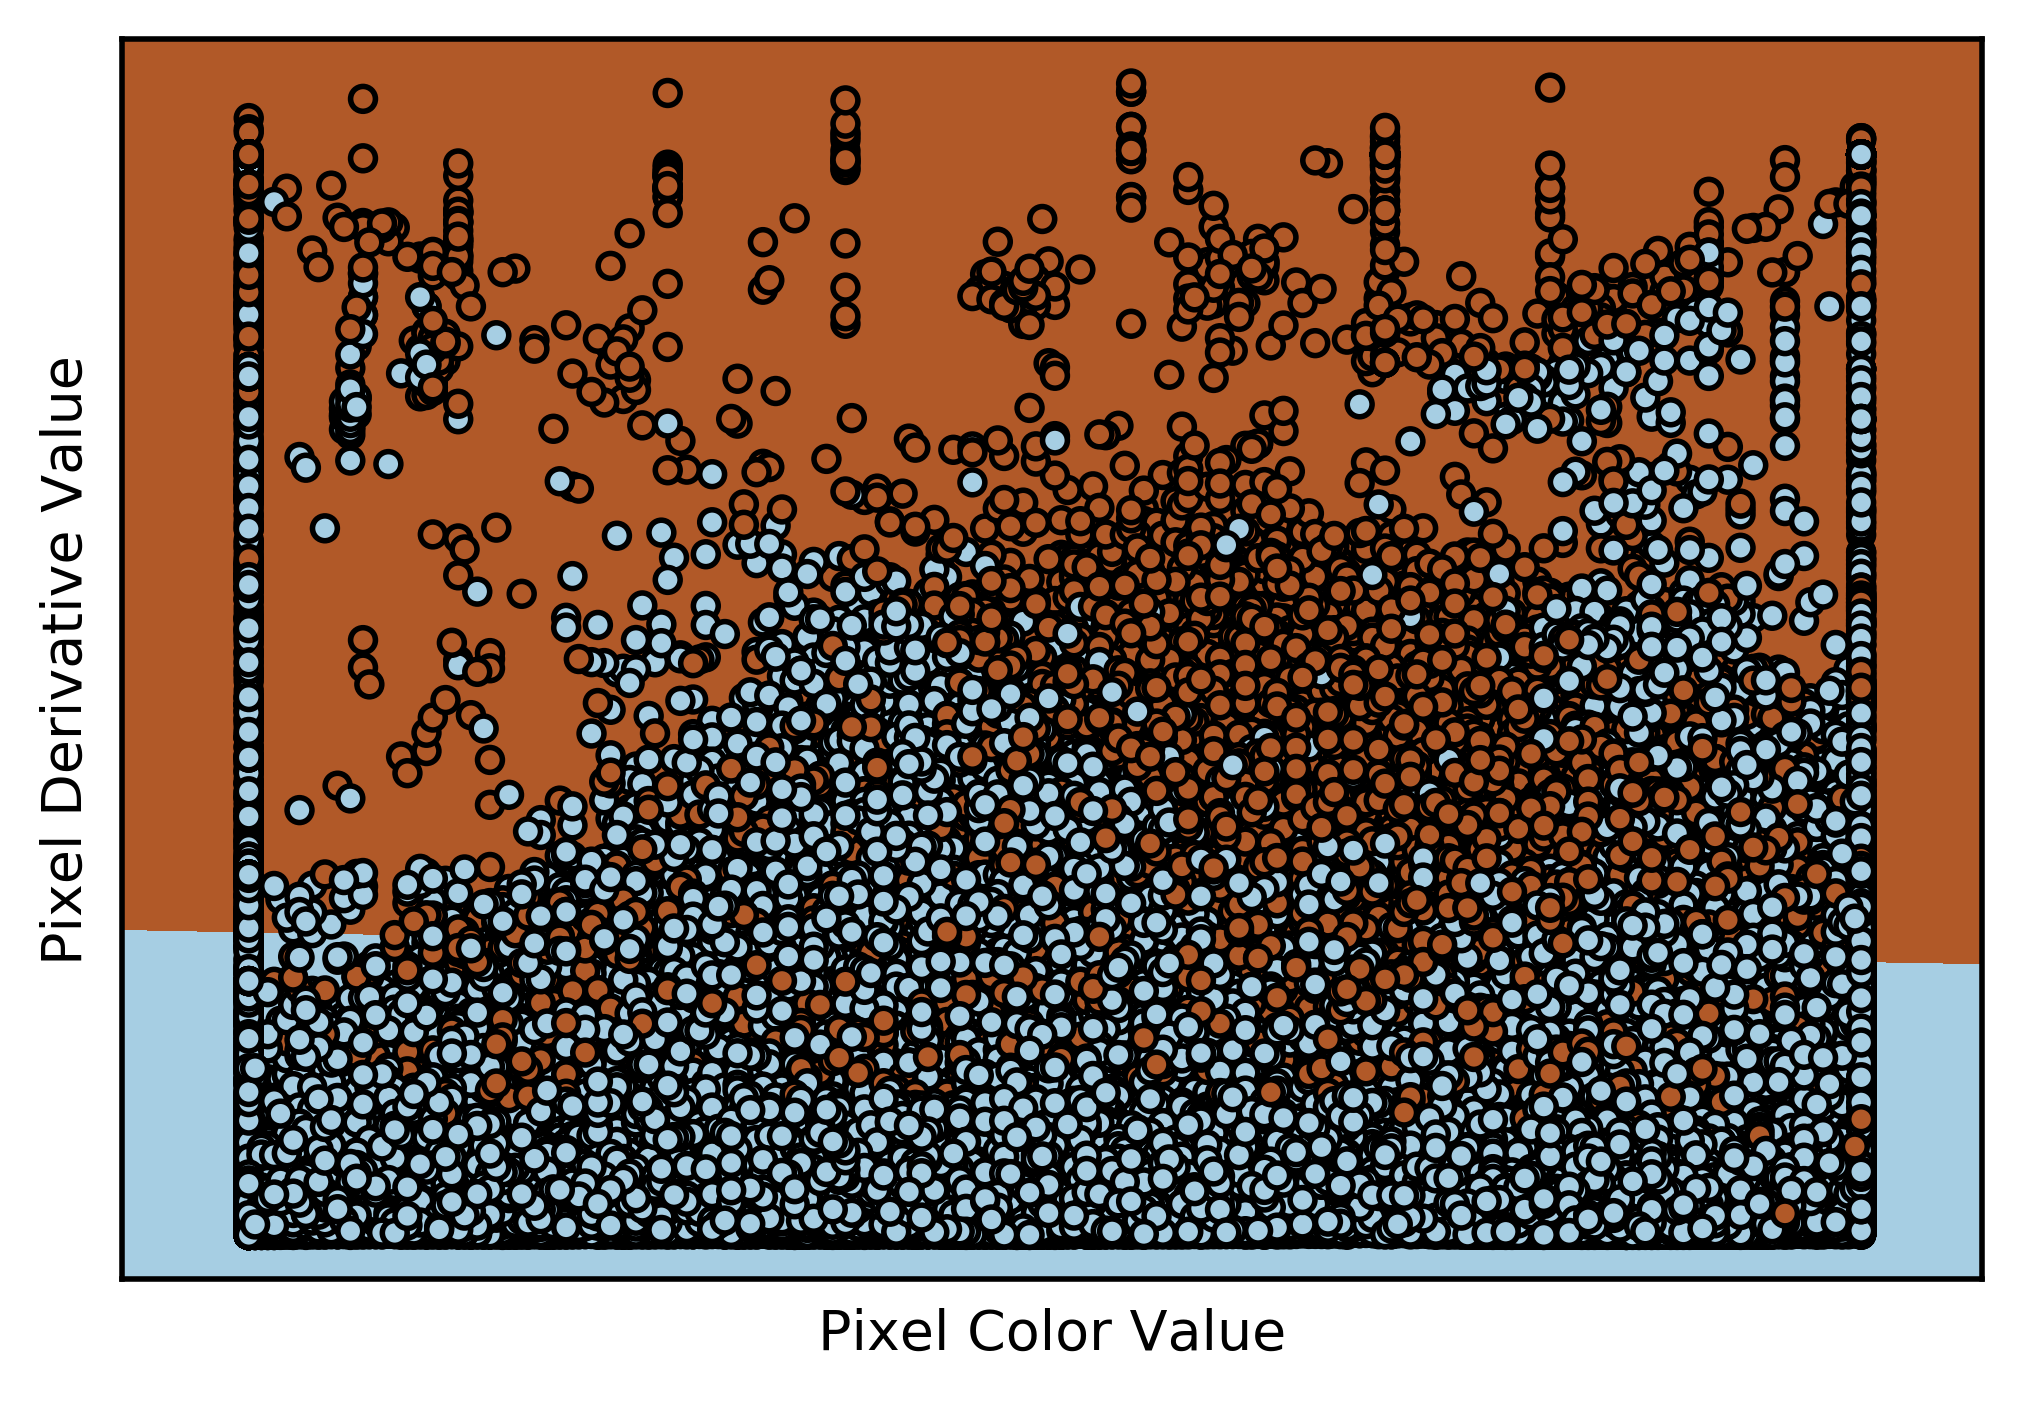

In [16]:
h = 1.  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 20., X[:, 0].max() + 20.
y_min, y_max = X[:, 1].min() - 500., X[:, 1].max() + 500.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Pixel Color Value')
plt.ylabel('Pixel Derivative Value')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.savefig('./images/Logistic_datapoints.png')

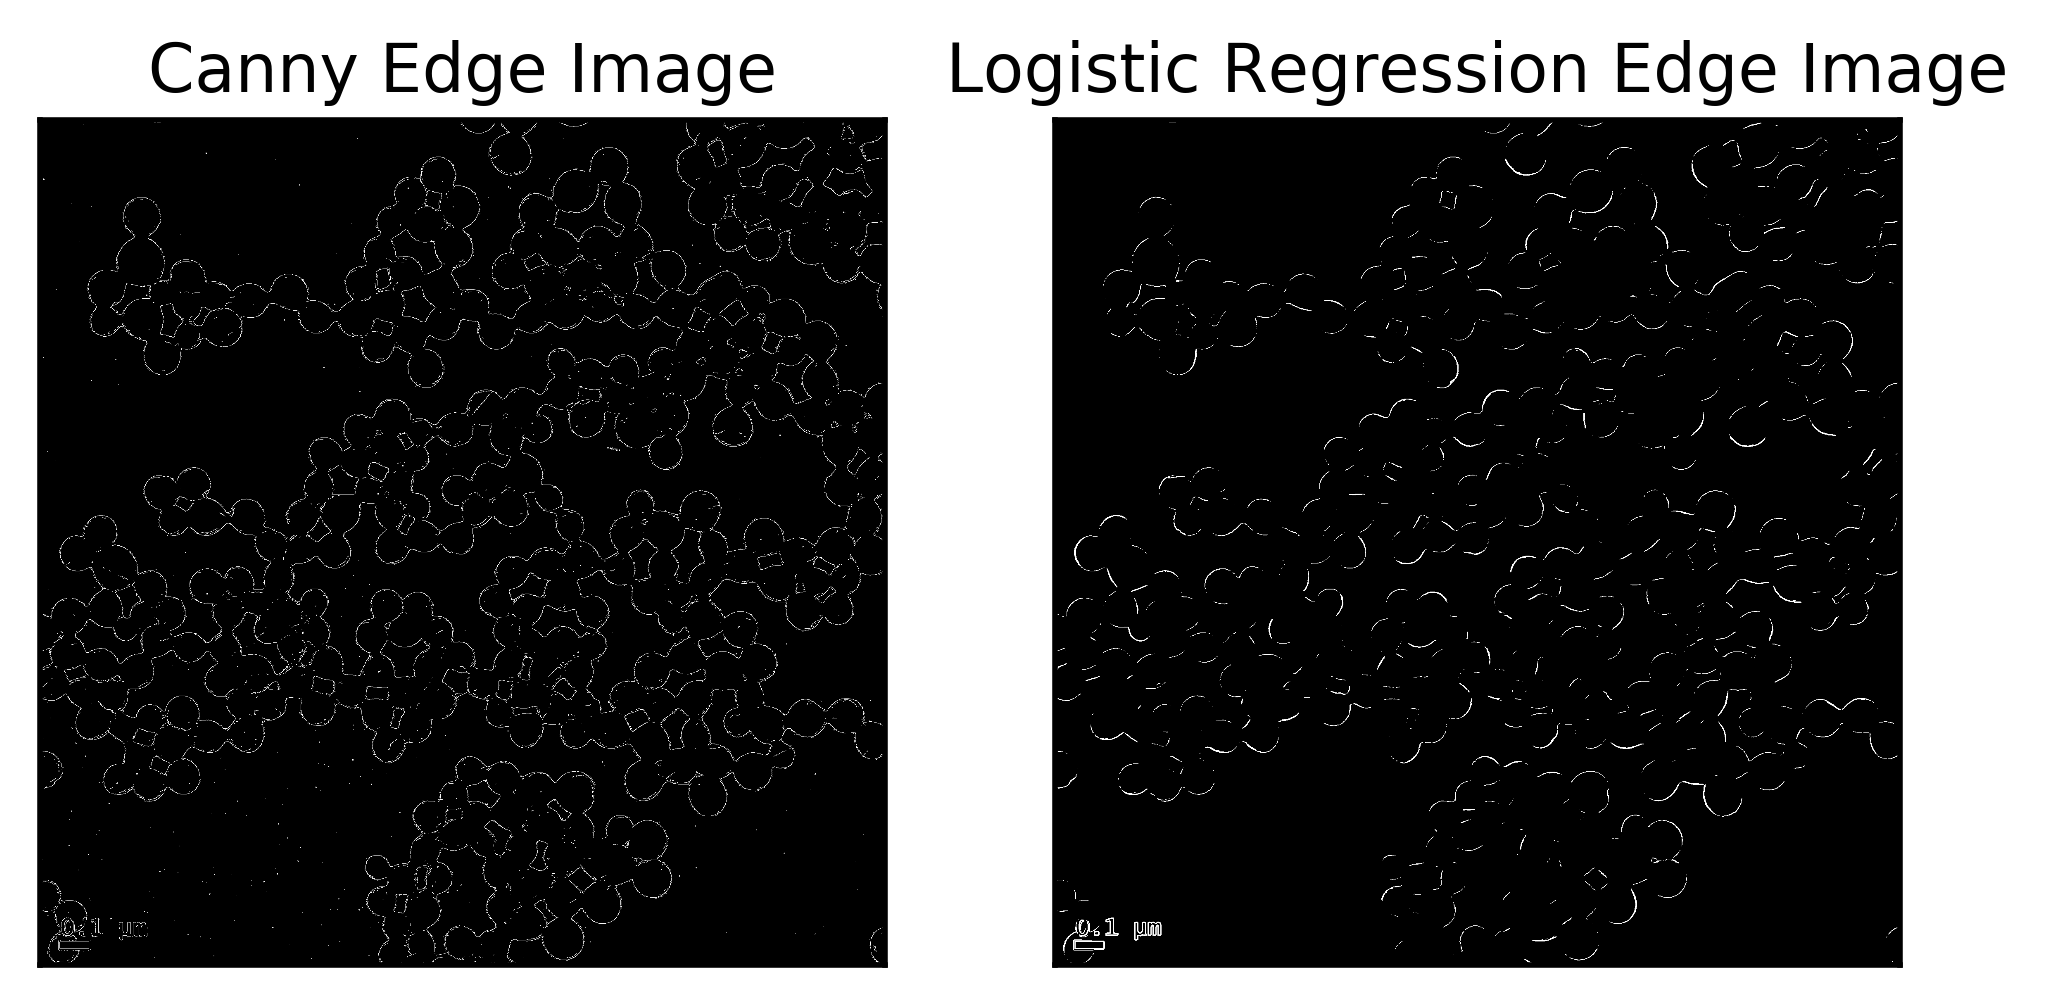

In [19]:
# Prediction based on the Logistic Regression function fitted above
logreg_edges=logistic.predict(X)
logreg_edges_img=logreg_edges.reshape((2048, 2048))*255

# Plotting
plt.subplot(121),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(logreg_edges_img,cmap = 'gray')
plt.title('Logistic Regression Edge Image'), plt.xticks([]), plt.yticks([])

plt.savefig('./images/Canny_Logistic.png')

## Test Same Logistic Function on 2 more Images 

In [10]:
# Image 2
img2 = cv2.imread('kapany.jpg',0)
# Our algorithm implemented on image 2
sobelx2 = cv2.Sobel(img2,cv2.CV_64F,1,0,ksize=5)
sobely2 = cv2.Sobel(img2,cv2.CV_64F,0,1,ksize=5)
sobel2 = np.sqrt(np.square(sobelx2)+np.square(sobely2))

X12=img2.reshape(-1)
X22=sobel2.reshape(-1)
XX2=np.zeros((len(X12),2))
XX2[:,0]=X12
XX2[:,1]=X22
logreg_edges2=logistic.predict(XX2)
logreg_edges_img2=logreg_edges2.reshape((2048, 2048))*255

# Image 3
img3 = cv2.imread('./images/3.tif',0)
# Our algorithm implemented on image 3
sobelx3 = cv2.Sobel(img3,cv2.CV_64F,1,0,ksize=5)
sobely3 = cv2.Sobel(img3,cv2.CV_64F,0,1,ksize=5)
sobel3 = np.sqrt(np.square(sobelx3)+np.square(sobely3))

X13=img3.reshape(-1)
X23=sobel3.reshape(-1)
XX3=np.zeros((len(X13),2))
XX3[:,0]=X13
XX3[:,1]=X23

logreg_edges3=logistic.predict(XX3)
logreg_edges_img3=logreg_edges3.reshape((2048, 2048))*255

# Plotting
plt.subplot(221),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(logreg_edges_img2,cmap = 'gray')
plt.title('Our Edge Detector'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(img3,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(logreg_edges_img3,cmap = 'gray')
plt.xticks([]), plt.yticks([])


plt.savefig('./images/Img23_Original_Logistic.png')

NotFittedError: This LogisticRegression instance is not fitted yet